In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use("seaborn")

In [2]:
data = pd.read_csv("test.csv", names=["n", "l", "vi", "v", "vf", "s1", "s2", "msk", "a"])
bit_mask = [bin(i) for i in data["msk"]]
data["msk"] = bit_mask

In [3]:
data

,n,l,vi,v,vf,s1,s2,msk,a
0,50,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0b1111,100.00000
1,40,100.000000,52.847008,83.333333,0.000000,20.758191,65.277778,0b110,100.00000
2,30,31.415927,52.847008,22.360680,52.847008,13.237523,18.178404,0b1001,86.60254
3,25,98.000000,48.989795,83.333333,52.847008,22.722222,77.241809,0b110,100.00000
4,20,2.000000,44.721360,83.333333,48.989795,2.000000,0.000000,0b110,100.00000
5,15,10.000000,0.000000,8.333333,44.721360,0.347222,0.347222,0b1100,100.00000
6,10,236.854386,0.000000,0.000000,0.000000,0.000000,0.000000,0b1111,100.00000


/tmp/ipykernel_14834/2769793305.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


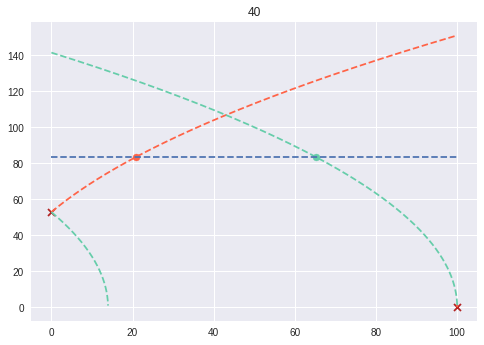

/tmp/ipykernel_14834/2769793305.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


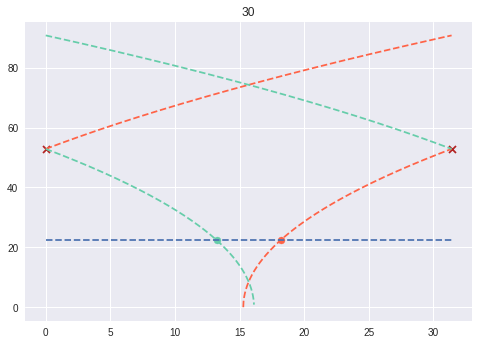

/tmp/ipykernel_14834/2769793305.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


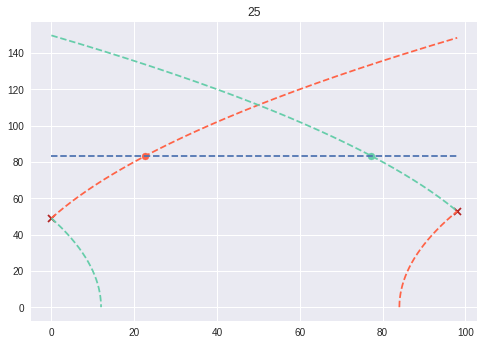

/tmp/ipykernel_14834/2769793305.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


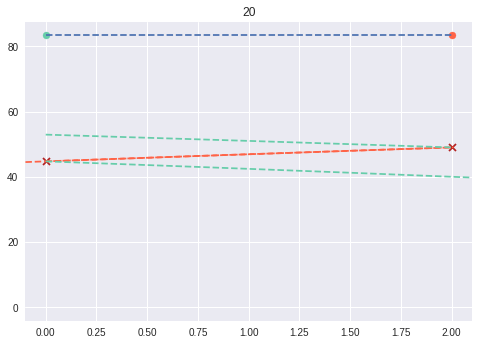

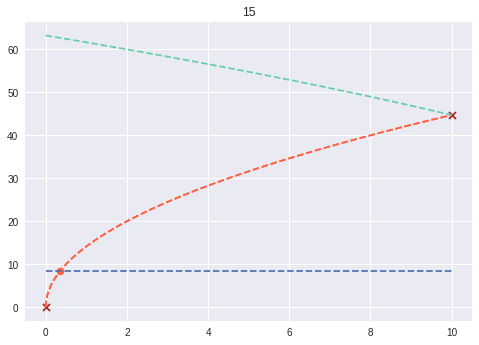

In [29]:
howmany = 6
for i in range(howmany):
    d = data.iloc[i]
    if int(d.msk,2) != 0b1111:
        step = 0.01
        s0a = d.l - (d.vf**2)/(2*d.a)
        s0d = - (d.vi**2)/(-2*d.a)

        s_a_first_point = np.arange(stop=d.l + step, step = step)
        s_a_second_point = np.arange(start=s0a, stop=d.l + step, step=step)
        s_d_first_point = np.arange(stop=s0d + step, step = step)
        s_d_second_point = np.arange(start=0, stop=d.l + step, step=step)

        v1as = np.sqrt(2*d.a * s_a_first_point + pow(d.vi,2))
        v2as = np.sqrt(2*d.a * (s_a_second_point-s0a))
        v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))
        v2ds = np.sqrt(-2*d.a * (s_d_second_point-d.l) + pow(d.vf,2))

        plt.title(d.n)
        plt.plot(s_a_first_point, v1as, linestyle="--", color="tomato")
        plt.plot(s_a_second_point, v2as, linestyle="--", color="tomato")
        plt.plot(s_d_first_point, v1ds, linestyle="--", color="mediumaquamarine")
        plt.plot(s_d_second_point, v2ds, linestyle="--", color="mediumaquamarine")

        plt.scatter(0, d.vi, color="firebrick", marker='x')
        plt.scatter(d.l, d.vf,  color="firebrick", marker = 'x')
        plt.hlines(d.v, 0, d.l, linestyle='--')

        color_s1 = "tomato" if (int(d.msk, 2) & 0b0100 > 0) else "mediumaquamarine"
        color_s2 = "tomato" if (int(d.msk, 2) & 0b1000 > 0) else "mediumaquamarine"
        plt.scatter(d.s1, d.v, color=color_s1)
        plt.scatter(d.s2, d.v, color=color_s2) 

        plt.xlim([-0.05 * d.l, d.l * (0.05 + 1)]) # extend the range of 5%
        plt.show()
    
